# MECANISMO CUATRO BARRAS 

## PROBLEMA POSICIÓN

### PASO 1: MODELADO DEL MECANISMO

El mecanismo de partida es el conocido como cuatro barras. Podemos ver todas las variables en la figura.

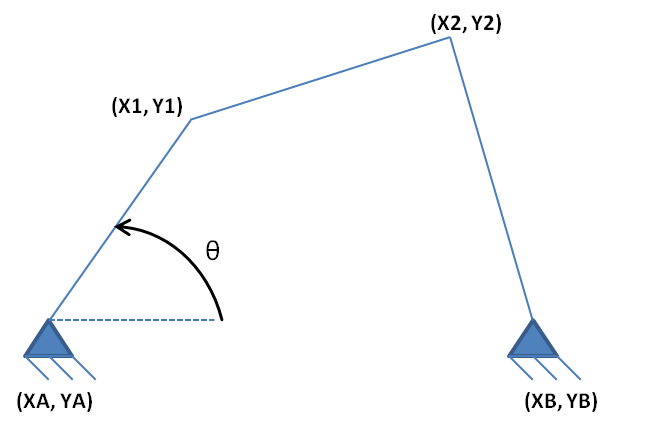

### PASO 2: GRADOS DE LIBERTAD

Los grados de libertad se calculan:

$G = 3·(n-1) - 2·PI - PII$

Siendo:

PI -> Numero de pares binarios de un grado de libertad 

PII -> Número de pares binarios de dos grados de libertad.
En este caso tendríamos:

\begin{eqnarray}
n &=& 4  \\
P_{I} &=& 4    \\
P_{II} &=& 0 
\end{eqnarray}

Por lo tanto:

$G = 3·(4-1) - 2·4 - 0 = 1$ 

### PASO 3: DEFINICIÓN DEL VECTOR q

El vector $\mathbf{q}$ de dimensión $N \times 1$ contiene las coordenadas dependientes del mecanismo. Es decir, contiene las coordenadas que no se mantienen fijas ya que varían con el tiempo. 

Lo hemos modelado empleando las $5$ coordenadas:

\begin{equation}
\mathbf{q} = 
 \begin{bmatrix}
 x_1 \\ y_1 \\ x_2 \\ y_2 \\ \theta
 \end{bmatrix}
\end{equation}


### PASO 4: IMPLEMENTACIÓN EN PYTHON

Al igual que en otros entornos de programación, necesitamos añadir librerías que contengan las funciones que vamos a utilizar. Esto es necesario hacerlo al principio del código. Las que vamos a usar son las siguientes: 

1. numpy -> Sirve para trabajar con arrays y matrices, ofreciendo una interfaz similar a los comandos en MATLAB. 
2. math -> La utilizaremos para usar funciones matemáticas.
3. pprint -> "pretty print", su función es ayudar a depurar el código.
4. matplotlib.pyplot -> Es necesaria para dibujar gráficas.


In [1]:
#PASO 4

import numpy as np
import math as math
import pprint  
import matplotlib.pyplot as plt  
import scipy.integrate as integrate 


### PASO 5: LECTURA DE DATOS

Los datos iniciales de los que partiremos para resolver este mecanismo mediante análisis cinemático por métodos numéricos son los parámetros constantes que definen el mecanismo, es decir, las variables que no cambian con el tiempo. En este caso serían las longitudes de las barras y las posiciones de los apoyos.

Además, como el mecanismo tiene un único grado de libertad, tenemos que escoger la **variable independiente** entre las componentes del vector q. En este caso hemos escogido el ángulo, por lo que también será un dato de partida.

1. Longitudes de las barras: $L_1, ~ L_2 ~ y ~ L_3$.
2. Posición de los dos apoyos: $X_A, ~ Y_A, ~ X_B ~ e ~ Y_B$.
3. Ángulo que forma la primera barra respecto a la horizontal en radianes: $θ(t=0)$.

Una vez tengamos esos datos, definiremos una posición inicial.

In [2]:
#PASO 5

print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:2
Introduce longitud L3:2.5
Introduce angulo inicial theta:0
Introduce coordenada en x del punto B:3
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [0. ]]


### PASO 6: LEY DE GRASHOFF

El mecanismo cuatro barras es un tipo de cuadrilátero articulado.
Partimos de las cuatro longitudes de los elementos de la cadena cinemática $a$, $b$, $c$ y $d$, siendo $a<b<c<d$. Con estas barras hay tres configuraciones posibles de cadenas cinemáticas distintas.

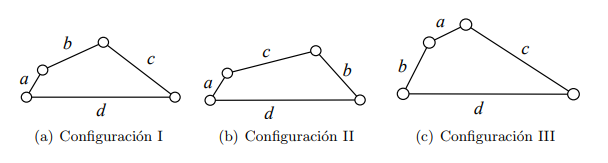

Para estudiar las condiciones geométricas que deben darse para que una barra sea manivela o balancín, hay que saber cuándo una barra puede dar vueltas completas con respecto a otra. Si demostramos que una barra puede dar vueltas completas con respecto a otra en una de las tres configuraciones de la figura, también podrá hacerlo en las otras dos.

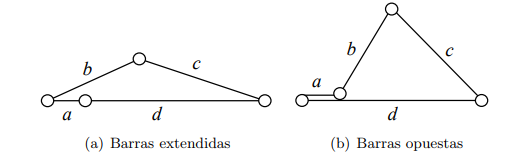

Para que la barra $a$ pueda dar vueltas completas con respecto a la barra $d$, deben poder alcanzarse las dos posiciones representadas en la figura anterior, en las cuales $a$ y $d$ aparecen alineadas. Estas configuraciones son conocidas como posiciones límite.

Podemos escribir:

$\text{a)} \rightarrow b+c > a+d $ 

$\text{b)} \rightarrow d-a > c-b $ 

La primera ecuación expresa una propiedad de los triángulos que establece que la suma de las longitudes de dos de sus lados es mayor que la del tercero. 
Por su parte, la segunda ecuación expresa la propiedad que establece que la diferencia de las longitudes de dos lados es menor que la del tercero. 

La segunda ecuación también se puede escribir como:

$\text{b)} \rightarrow d+b > c+a $ 

Para obtener estas expresiones partimos de la hipótesis de que $a$ puede dar vueltas completas con respecto a $d$. Podríamos seguir el mismo procedimiento con el resto de combinaciones entre barras para obtener una tabla de desigualdades como la siguiente:

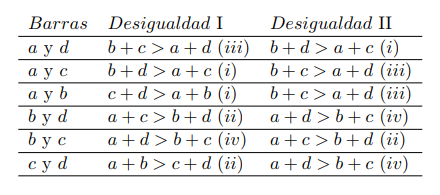

En la tabla apreciamos que hay solo cuatro tipos de desigualdades diferentes: $i$, $ii$, $iii$ y $iv$. 

$i$ -> Se sumplen automáticamente, como por ejemplo que la suma de las dos barras más largas es mayor que la suma de las dos barras más cortas.

$ii$ -> Son imposibles, como que la suma de las dos barras más cortas es mayor que la suma de las dos más largas.

$iii$ y $iv$ -> Son opuesta la una a la otra y pueden cumplirse o no. La desigualdad $iii$ es conocida como desigualdad de Grashoff. 

Podemos sacar las siguientes conclusiones de la tabla:

1. La única barra que puede dar vueltas completas con respecto a las demás es la pequeña. Esto se puede verificar comprobando en la tabla que cuando la barra $a$ no aparece en la primera columna siempre aparece una condición imposible.

2. Si la barra pequeña puede dar vueltas completas con respecto de otra barra, también podrá hacerlo con respecto al resto. Es decir, para que la barra $a$ pueda dar vueltas completas tiene que cumplir la desigualdad de Grashoff y una vez tengamos esto se satisfacen también las condiciones necesarias para que de vueltas completas con respecto a $b$, $c$ y $d$.

Si se cumple la desigualdad de Grashoff hay varios movimientos posibles para el cuadrilátero:

1. Doble manivela si el elemento $a$ es fijo. Las barras contiguas al fijo dan vueltas completas, por lo que son manivelas.

2. Manivela-balancín si $a$ es contiguo al elemento fijo.

3. Doble balancín si el elemento $a$ es opuesto al fijo.

En caso de no cumplirse la desigualdad de Grashoff, el cuadrilátero será de doble balancín.

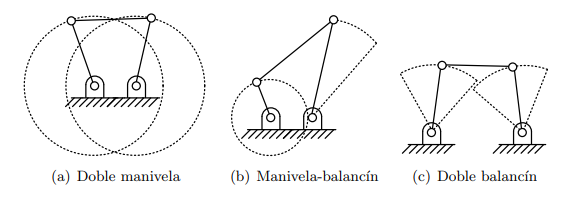



In [3]:
# PASO 6

a = meca["XB"] - meca ["XA"] 
b = meca["L1"]
c = meca["L2"]
d = meca["L3"]

ListaDeLongitudes = [d, c, b, a]

def ordenar(lista):
    
    for x in range (1, len(lista)):
        for y in range(len(lista)-1):
            if lista[y] < lista[y+1]:
                aux = lista[y]
                lista[y] = lista[y+1]
                lista[y+1] = aux
                
ordenar(ListaDeLongitudes)


print(ListaDeLongitudes)

a = (ListaDeLongitudes[3])
b = (ListaDeLongitudes[2])
c = (ListaDeLongitudes[1])
d = (ListaDeLongitudes[0])

if ((b+c)<(a+d)):
    print ("No cumple la desigualdad de Grashoff, por lo que la simulación no se ejecutará correctamente.")

[3.0, 2.5, 2.0, 1.0]


### PASO 7: MATRIZ DE RESTRICCIONES $\Phi(q)$


Este vector agrupa las ecuaciones de restricción y será de dimensión $mx1$.

Estas ecuaciones podrían definirse empleando diferentes tipos de coordenadas: independientes, dependientes, relativas dependientes, de punto de referencia y naturales. Estas últimas son las que vamos a usar nosotros. 

Para coordenadas naturales en el plano es necesario seguir un procedimiento:

1. Cada sólido debe tener al menos $2$ puntos.
2. Cada par de rotación debe tener $1$ punto.
3. Cada par prismático debe tener $3$ puntos alineados.
4. Se pueden añadir tantos puntos adicionales como fuera necesario.
5. De los puntos mencionados, los fijos no entran en el vector $q$.

Para la formación de la matriz de restricciones, tenemos que tener en cuenta que hay restricciones de sólido rígido y de pares cinemáticos.

En este caso necesitamos:



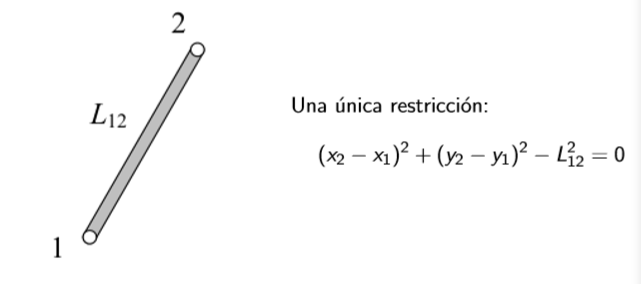

Esta restricción tiene la función de imponer que los puntos de los extremos de cada barra permanezcan a una distancia constante. Debemos aplicarla a las 3 barras del mecanismo. Es decir, tendríamos:


$\text{Barra 1} \rightarrow (X_1 - X_A)^2 + (Y_1 - Y_A)^2 - L_1^2 = 0$ 

$\text{Barra 2} \rightarrow (X_1 - X_1) ^2 + (Y_2 - Y_1)^2 - L_2^2 = 0$

$\text{Barra 3} \rightarrow (X_B - X_2) ^2 + (Y_B - Y_2) ^2 - L_3^2 = 0$ 

Además, como el vector de coordenadas dependientes tiene $5$ componentes tenemos que añadir una ecuación de restricción para el ángulo.

Esta última ecuación depende de si el ángulo en cuestión es demasiado pequeño. Esto se debe a que cuando un ángulo tiende a $0$, su seno también lo hace, por lo que para esos casos utilizaríamos la restricción del coseno. En cambio, cuando el ángulo tiende más a $90^\circ$, es el coseno el que se aproxima a $0$, por lo que en esos casos la restricción a utilizar sería la del seno. 

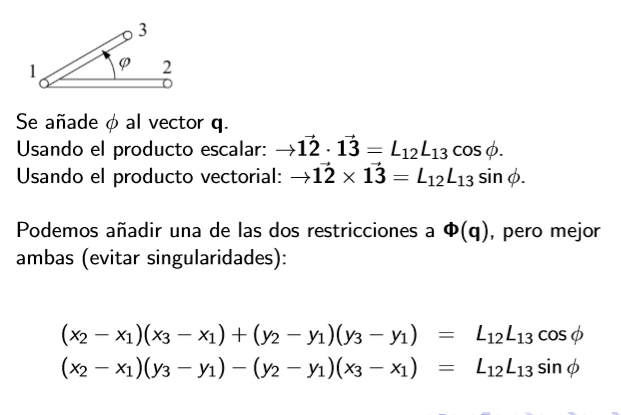
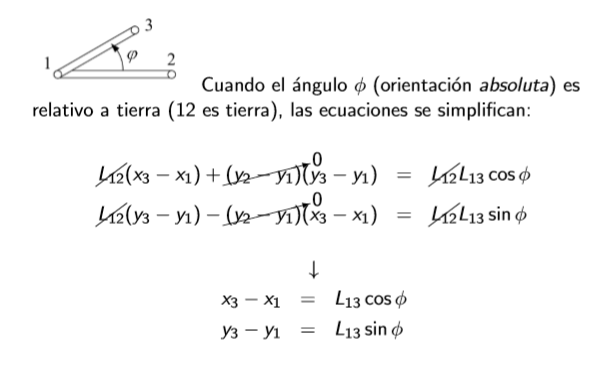

Para nuestro caso tendríamos:

$Si ~~ \cos (θ) < \frac{1}{\sqrt{2}} \rightarrow (X_1 - X_A) - L_1 · \cos(θ)$

$Si ~~ \cos (θ) > \frac{1}{\sqrt{2}} \rightarrow (Y_1 - Y_A) - L_1 ·  \sin (θ)$


La matriz quedaría:

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$
\begin{equation}
\mathbf{\Phi} = 
\begin{bmatrix}
(X_1-X_A)^2 + (Y_1-Y_A)^2 - L_1^2  \\
(X_2-X_1)^2 + (Y_2-Y_1)^2 - L_2^2 \\
(X_B-X_2)^2 + (Y_B-Y_2)^2 - L_3^2 \\
 X_1-L_1\cos(θ)\\
\end{bmatrix}
\end{equation}

2. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi} = 
\begin{bmatrix}
(X_1-X_A)^2 + (Y_1-Y_A)^2 - L_1^2  \\
(X_2-X_1)^2 + (Y_2-Y_1)^2 - L_2^2 \\
(X_B-X_2)^2 + (Y_B-Y_2)^2 - L_3^2 \\
 Y_1-L_1\sin(θ)\\
\end{bmatrix}
\end{equation}


In [4]:
#PASO 7

def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (meca["XB"]-X2)**2 + Y2**2 - meca["L3"]**2

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)

    return Phi


### PASO 8: Matriz jacobiana $\Phi_q$

Esta matriz de dimensiones $mxn$ está compuesta por las derivadas parciales de las ecuaciones de restricción con respecto al vector de coordeandas dependientes.

Por ejemplo tendríamos:


$\Phi_q(0,0) ~ = ~ Derivada ~ de ~ \Phi (0) ~ respecto ~ a ~ X1. $
$\Phi_q(0,1) ~ = ~ Derivada ~ de ~ \Phi (0) ~ respecto ~ a ~ Y1. $
$\Phi_q(1,0) ~ = ~ Derivada ~ de ~ \Phi (1) ~ respecto ~ a ~ X1. $

Tendríamos que construir la matriz elemento a elemento de esta manera.

Para la ecuación del ángulo hay que tener en cuenta que el jacobiano también tomará dos valores. Los posibles son: 

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$
   
    $\Phi_q(3,0)~ = ~ 1$ 
    $\Phi_q(3,4) ~ = ~ L1 · \sin(θ)$ 
    
    
    
2. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

    $\Phi_q(3,1) = 1$ 
    $\Phi_q(3,4) = -L1 · \cos(θ)$
    

Es decir, tenemos dos posibles matrices jacobianas:

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi_q} = 
\begin{bmatrix}
2X_1 & 2Y_1 & 0 & 0 & 0 \\
-2(X_2-X_1) & -2(Y_2-Y_1) & 2(X_2-X_1) & 2(Y_2-Y_1) & 0\\
0 & 0 & -2(X_B-X_2) & 2Y_2 & 0\\
1 & 0 & 0 & 0 & L1\sin(θ)\\
\end{bmatrix}
\end{equation}

1. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi_q} =
\begin{bmatrix}
2X_1 & 2Y_1 & 0 & 0 & 0  \\
-2(X_2-X_1) & -2(Y_2-Y_1) & 2(X_2-X_1) & 2(Y_2-Y_1) & 0 \\
0 & 0 & -2(X_B-X_2) & 2Y_2 & 0 \\
0 & 1 & 0 & 0 & -L1\cos(θ) \\
\end{bmatrix}
\end{equation}



In [5]:
#PASO 8

def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(meca["XB"]-X2)
    Jacob[2,3] = -2*(0-Y2)

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[3,4] = meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = -meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1


    Jacob[4,4] = 1

    return Jacob




### PASO 9: RESOLUCIÓN DEL PROBLEMA POSICIÓN

El objetivo es obtener los valores de las coordenadas dependientes del vector $q$. 


Para resolverlo partimos de la ecuación:

$\Phi(q+Δq) = \Phi + \Phi_q · Δq = 0$

De donde despejamos:

$\Phi_q · Δq = -\Phi$


Esta ecuación se convertiría en $Ax=b$, siendo $A$ el jacobiano y $b$ $\Phi$. Sin embargo, no se pueden dividir matrices de esa manera, por lo que tenemos que multiplicar a ambos lados  de la igualdad por la izquierda por $A^{-1}$, es decir, por la inversa del jacobiano $Фq^{-1}$:

$ \underbrace{ \Phi q^-1 · Фq}_{= \mathbf{I_n}} · Δq = Фq^{-1} ·-Φ$

Por el lado izquierdo al multiplicar el jacobiano por su inversa toma el valor la unidad, por lo que quedaría:

$Δq = \Phi_q^{-1} · -Φ$

Y para terminar, tendríamos que el nuevo valor de q sería:

$q = q + Δq$

Hay que repetir este proceso hasta que el vector $\Phi$ se aproxime a $0$, lo que indicaría la validez del vector $q$ calculado. Sin embargo, hay datos iniciales para los que el mecanismo no converge. Por ejemplo, si decimos que $X_A=0, ~ X_B=2 ~ y ~ L_2=32$, no existe tal posición. Por ello, tenemos que poner un límite de iteraciones, como por ejemplo $100$, y si llega a dicho límite tendremos que el mecanismo no converge.

Para poder operar con las matrices de ese modo, es necesario que las dimensiones sean correctas. En este caso tendríamos que añadir una fila a la matriz $\Phi$ y a $\Phi_q$. 
Como el mecanismo tiene un grado de libertad tenemos que asignar un valor conocido a una de las variables dependientes, como ya se explicó anteriormente. Esto se traduce en que para la matriz de restricciones $\Phi(4)=0$, ya que su valor permanece invariable. 
Por otro lado para la matriz $\Phi_q$ tendríamos que para la variable conocido su valor sería uno y el resto 0. Es decir:

$\text{Фq(4)} \rightarrow (0, 0, 0, 0, 1)$ 

Otra forma de medir el error en el cálculo de q es calculando el módulo del vector $Δq$. Tiene que ser lo más próximo a $0$. 

Por último, podemos saber si el mecanismo convergerá calculando el rango de la matriz jacobiana. Si su rango es igual al número de coordenadas dependientes, convergerá.

In [6]:
#PASO 9

def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        print("q=")
        pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)
        print ("Phi" + "=")
        pprint.pprint(fi)
        J = jacob_Phiq(q,meca)
        print ("jacob" + "=")
        pprint.pprint(J)
        rango = np.linalg.matrix_rank(J, 1e-5)
        print("rango=" + str(rango) + "\n") #Si el rango es menor que el numero de filas no tiene solucion
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1
        
        print("error iter" + str(i) + "=")
        pprint.pprint(error)
    print("num iters:" + str(i))
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición') 
    return q

q=resuelve_prob_posicion(q,meca)

q=
array([[0.1],
       [1. ],
       [1. ],
       [0.2],
       [0. ]])
Phi=
array([[ 0.01],
       [-2.55],
       [-2.21],
       [ 1.  ],
       [ 0.  ]])
jacob=
array([[ 0.2,  2. ,  0. ,  0. ,  0. ],
       [-1.8,  1.6,  1.8, -1.6,  0. ],
       [ 0. ,  0. , -4. ,  0.4,  0. ],
       [ 0. ,  1. ,  0. ,  0. , -1. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ]])
rango=5

error iter1=
19.19195767662633
q=
array([[ 10.05      ],
       [  0.        ],
       [ -1.17605634],
       [-16.03556338],
       [  0.        ]])
Phi=
array([[100.0025    ],
       [379.16363383],
       [268.32873946],
       [  0.        ],
       [  0.        ]])
jacob=
array([[ 20.1       ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 22.45211268,  32.07112676, -22.45211268, -32.07112676,
          0.        ],
       [  0.        ,   0.        ,  -8.35211268, -32.07112676,
          0.        ],
       [  0.        ,   1.        ,   0.        ,   0.        ,
         -1.        ],
  

### PASO 10: Dibujar el mecanismo

Para dibujar el mecanismo, definimos un cuadro de dibujo con los ejes de la misma dimensión. Seguidamente, dibujamos cada barra por separado. 
Para dibujar cada barra tendríamos que indicar las posiciones inicial y final, yendo por un lado las coordenadas en el eje $X$ y por otro las coordenadas en el eje $Y$. Es decir, sería por ejemplo:

$Barra ~ 1 \rightarrow  ([X_A, X_1], [Y_A, Y_1])$


q=
array([[ 1.00000000e+00],
       [ 9.12892351e-32],
       [ 1.43750000e+00],
       [-1.95156187e+00],
       [ 0.00000000e+00]])
Phi=
array([[ 0.00000000e+00],
       [-4.44089210e-16],
       [ 0.00000000e+00],
       [ 9.12892351e-32],
       [ 0.00000000e+00]])
jacob=
array([[ 2.00000000e+00,  1.82578470e-31,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-8.75000000e-01,  3.90312375e+00,  8.75000000e-01,
        -3.90312375e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.12500000e+00,
        -3.90312375e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])
rango=5

error iter1=
1.42222370596101e-16
num iters:1


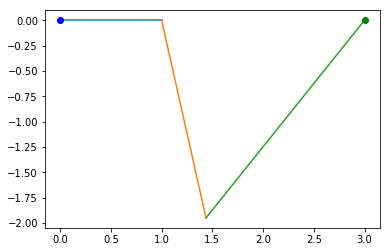

In [7]:
#PASO 10


def dibuja_mecanismo(q, meca):
    
    q = resuelve_prob_posicion(q,meca)
    
    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    
    
    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, meca["XB"]], [Y2, meca ["YB"]])  
    
    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go') 

    plt.show()#block=False) 
    return

dibuja_mecanismo(q,meca)
